# plant-seedlings-classification

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.conv_learner import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.backends.cudnn.enabled

True

In [5]:
PATH="data/plant-seedlings-classification/"
sz=224
bs=28

# Initial exploration

## We need to add our validation dataset firstly

In [6]:
import os as os 
from os import *
import random

In [7]:
classes=!ls {PATH}/train

In [8]:
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [9]:
path="/home/nbuser/courses/fastai/courses/dl1/data/plant-seedlings-classification/"
def make_valid(chosen_files,class_dir):
    for i in range(len(chosen_files)):
        !cp '{path}train/{class_dir}/{chosen_files[i]}' '{path}/valid/{class_dir}/'

In [10]:
for classname in classes:
    os.makedirs(f'{PATH}valid/{classname}',exist_ok=True)

In [11]:
for classname in classes:
    list_of_files=!ls "{PATH}train/{classname}"
    random.shuffle(list_of_files)
    files_moved=int(len(list_of_files)*0.2)
    selected_files=[list_of_files[m] for m in range(files_moved)]
    make_valid(selected_files,classname)

## Check about the data

In [6]:
os.listdir(PATH)

['test',
 'valid',
 'models',
 'train',
 'tmp',
 'subm',
 'sample_submission.csv',
 'train.zip']

In [10]:
os.listdir(f'{PATH}valid')

['Common Chickweed',
 'Scentless Mayweed',
 'Loose Silky-bent',
 'Common wheat',
 'Sugar beet',
 'Black-grass',
 'Maize',
 'Fat Hen',
 'Shepherds Purse',
 'Cleavers',
 'Small-flowered Cranesbill',
 'Charlock']

In [9]:
files = os.listdir(f'{PATH}train/Maize')[:5]
files

['f4dd93492.png',
 '3ef465952.png',
 '8bfe6860d.png',
 '3a6d4d007.png',
 'a53a61390.png']

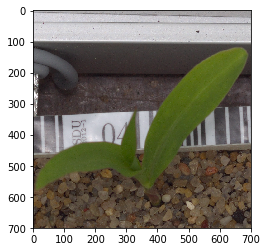

In [10]:
img = plt.imread(f'{PATH}train/Maize/{files[0]}')
plt.imshow(img);

In [12]:
img.shape

(700, 700, 3)

In [13]:
img[:4,:4]

array([[[0.70588, 0.69804, 0.71765],
        [0.70588, 0.69804, 0.71765],
        [0.70196, 0.69804, 0.71373],
        [0.6902 , 0.68235, 0.6902 ]],

       [[0.7098 , 0.70588, 0.72157],
        [0.7098 , 0.70196, 0.72157],
        [0.7098 , 0.70196, 0.71765],
        [0.70588, 0.69804, 0.7098 ]],

       [[0.71373, 0.7098 , 0.72549],
        [0.71373, 0.7098 , 0.72549],
        [0.71373, 0.70588, 0.72157],
        [0.7098 , 0.70196, 0.71765]],

       [[0.71765, 0.7098 , 0.72941],
        [0.71765, 0.7098 , 0.72941],
        [0.71765, 0.7098 , 0.72941],
        [0.72941, 0.72157, 0.73725]]], dtype=float32)

In [8]:
files = os.listdir(f'{PATH}valid/Maize')[:5]
files

['59f972ef4.png',
 'bb9f796ce.png',
 'a4e71c6c3.png',
 '0cd0d9b8c.png',
 '69f06fcbc.png']

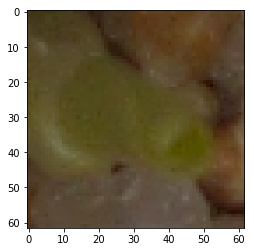

In [9]:
img = plt.imread(f'{PATH}valid/Maize/{files[0]}')
plt.imshow(img);

In [4]:
tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_side_on, max_zoom=1.3)

In [6]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),test_name='test')

In [8]:
fn=PATH+data.trn_ds.fnames[0]
fn

'data/plant-seedlings-classification/train/Black-grass/2ed589264.png'

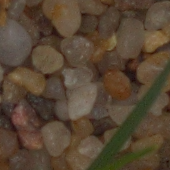

In [9]:
img=PIL.Image.open(fn)
img

In [10]:
img.size

(170, 170)

In [11]:
size_d={k:PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}

In [12]:
size_d.values()

dict_values([(170, 170), (107, 107), (545, 545), (751, 751), (171, 171), (151, 151), (478, 478), (511, 511), (440, 440), (368, 368), (1900, 1899), (94, 94), (447, 447), (89, 89), (906, 906), (2835, 2192), (2267, 2266), (1620, 1620), (372, 372), (470, 470), (521, 521), (906, 906), (975, 975), (685, 685), (1836, 1782), (371, 371), (641, 641), (638, 638), (1435, 1435), (1311, 1311), (78, 78), (1671, 1671), (772, 772), (505, 505), (575, 575), (352, 352), (1044, 1044), (1045, 1045), (685, 685), (1620, 1620), (680, 680), (753, 753), (178, 178), (180, 180), (82, 82), (502, 502), (1040, 936), (2840, 2132), (91, 91), (861, 861), (531, 531), (220, 220), (531, 531), (1074, 1074), (447, 447), (421, 421), (723, 723), (478, 478), (577, 577), (167, 167), (981, 981), (188, 188), (700, 700), (1122, 1122), (615, 614), (723, 723), (471, 471), (100, 100), (906, 906), (88, 88), (700, 700), (1006, 1005), (1328, 1328), (1120, 1105), (531, 531), (1130, 1130), (470, 470), (700, 700), (74, 74), (1949, 1718), (7

In [13]:
row_sz,col_sz=list(zip(*size_d.values()))

In [14]:
row_sz=np.array(row_sz)
col_sz=np.array(col_sz)

(array([3228., 1149.,  267.,   77.,   15.,    6.,    3.,    3.,    0.,    2.]),
 array([  49. ,  443.2,  837.4, 1231.6, 1625.8, 2020. , 2414.2, 2808.4, 3202.6, 3596.8, 3991. ]),
 <a list of 10 Patch objects>)

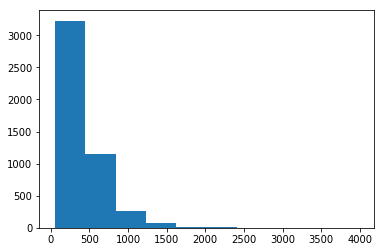

In [15]:
plt.hist(row_sz)#hist refer to the histogram

(array([1240., 1038.,  338.,  533.,  481.,  329.,  248.,  140.,   93.,   70.]),
 array([ 49., 144., 239., 334., 429., 524., 619., 714., 809., 904., 999.]),
 <a list of 10 Patch objects>)

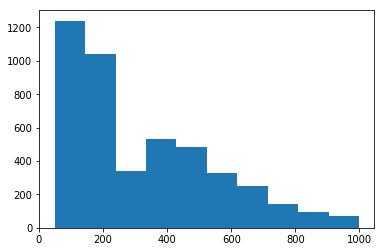

In [16]:
plt.hist(row_sz[row_sz<1000])#hist refer to the histogram

(array([2920., 1318.,  332.,  122.,   36.,   13.,    3.,    3.,    0.,    3.]),
 array([  49. ,  389.8,  730.6, 1071.4, 1412.2, 1753. , 2093.8, 2434.6, 2775.4, 3116.2, 3457. ]),
 <a list of 10 Patch objects>)

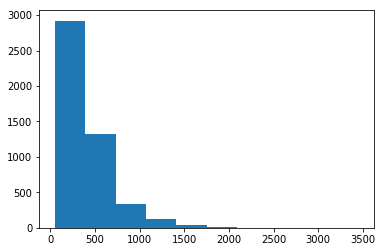

In [17]:
plt.hist(col_sz)

(array([1240., 1035.,  338.,  523.,  482.,  335.,  247.,  145.,   91.,   76.]),
 array([ 49. , 143.4, 237.8, 332.2, 426.6, 521. , 615.4, 709.8, 804.2, 898.6, 993. ]),
 <a list of 10 Patch objects>)

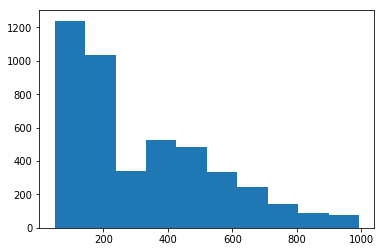

In [18]:
plt.hist(col_sz[col_sz<1000])#hist refer to the histogram

# Initial model

In [7]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [20]:
learn

Sequential(
  (0): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True)
  (1): Dropout(p=0.25)
  (2): Linear(in_features=4096, out_features=512)
  (3): ReLU()
  (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=512, out_features=12)
  (7): LogSoftmax()
)

In [8]:
learn.fit(1e-2, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.055606   0.463619   0.866912  
    1      0.66573    0.321464   0.896078                  
    2      0.518946   0.239651   0.936438                  



[0.23965071, 0.9364379088083903]

In [11]:
learn.fit(1e-2,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.316728   0.12963    0.961193  
    1      0.316164   0.116278   0.965625                  



[0.11627803, 0.965625]

In [16]:
learn.fit(1e-2,1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.30591    0.133871   0.960927  



[0.133871, 0.9609272877375284]

# Data Augmentation

## Data Augmentation

In [26]:
??image_gen

In [12]:
tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_side_on, max_zoom=1.3)

In [13]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [14]:
ims = np.stack([get_augs() for i in range(6)])

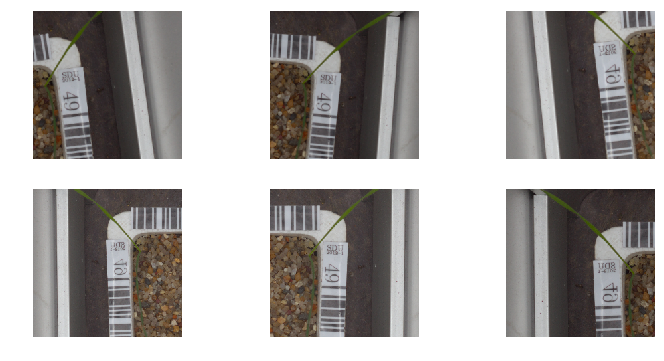

In [15]:
plots(ims, rows=2)

In [16]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms,test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [19]:
learn.fit(1e-2, 2)#I do this processing three times

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.349997   0.183682   0.944261  
    1      0.319071   0.13016    0.965359                  



[0.13016047, 0.9653594772020976]

In [20]:
learn.precompute=False

In [21]:
learn.fit(1e-2, 3, cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.47054    0.13459    0.967953  
    1      0.461564   0.135584   0.969261                  
    2      0.424317   0.129727   0.968219                  
    3      0.427881   0.131208   0.967177                  
    4      0.406095   0.132652   0.965094                  
    5      0.365778   0.121556   0.970302                  
    6      0.337155   0.119295   0.970302                  



[0.119294815, 0.9703022877375285]

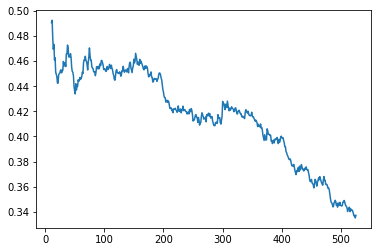

In [23]:
learn.sched.plot_loss()

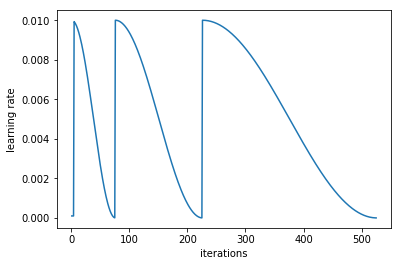

In [37]:
learn.sched.plot_lr()

In [24]:
learn.fit(1e-2,1,cycle_len=5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.410732   0.157045   0.941136  
    1      0.377962   0.127462   0.968219                  
    2      0.335706   0.114105   0.973427                  
    3      0.311446   0.109378   0.973427                  
    4      0.317308   0.109636   0.976552                  



[0.109636135, 0.9765522877375284]

## Fine-tuning and differential learning rate annealing

In [32]:
learn.freeze_to(6)
#start frome the 6th layers, all the layers now is trainable
#got a problem, if I set some layers untrainable,then the LR Annealing seems to report error

In [36]:
learn.unfreeze()

In [33]:
lr=1e-2

In [34]:
lrs=np.array([lr/18,lr/6,lr/2])

In [37]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.409846   0.158646   0.942953  
    1      0.258427   0.09872    0.964828                  
    2      0.172      0.083615   0.974734                  
    3      0.155886   0.059387   0.985417                  
    4      0.121506   0.04947    0.9875                    
    5      0.085378   0.033717   0.989583                   
    6      0.074069   0.034973   0.989583                   



[0.034973104, 0.9895833333333334]

In [22]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [23]:
accuracy_np(probs, y)

0.9947201689545935

In [26]:
learn.save('resnet50_seedlings')

In [30]:
learn.load('resnet50_seedlings')

# Create Submission

In [38]:
classes=!ls {PATH}/train

In [39]:
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [40]:
fnames=os.listdir(f'{PATH}test')

In [41]:
len(fnames)

794

In [42]:
log_preds,y=learn.TTA(is_test=True)

In [43]:
probs = np.mean(np.exp(log_preds),0)

In [44]:
probs.shape

(794, 12)

In [45]:
probs_max_class=np.array(classes[np.argmax(probs[0])])
for i in range(1,794):
    probs_max_class=np.append(probs_max_class,classes[np.argmax(probs[i])])

In [46]:
probs_max_class.size

794

In [47]:
df=pd.DataFrame(probs_max_class)
df.columns=["species"]

In [48]:
df.insert(0,'file',[o[5:] for o in data.test_ds.fnames])

In [49]:
df.head()

,file,species
0,780bd2a2c.png,Sugar beet
1,338c7e907.png,Charlock
2,4bbfd1e05.png,Cleavers
3,6edb96d45.png,Cleavers
4,a8388a37f.png,Fat Hen


In [50]:
SUBM=f'{PATH}subm/'
os.makedirs(SUBM,exist_ok=True)
df.to_csv(f'{SUBM}subm.gz',compression="gzip",index=False)

In [51]:
FileLink(f'{SUBM}subm.gz')

/home/nbuser/courses/fastai/courses/dl1/data/plant-seedlings-classification/subm/subm.gz

# Finding Learning Rate

In [61]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [62]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 95%|█████████▌| 57/60 [00:12<00:00,  4.60it/s, loss=9.59]

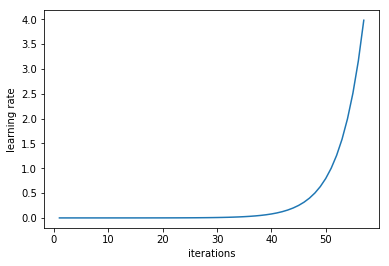

In [63]:
learn.sched.plot_lr()

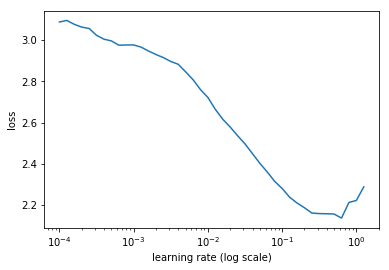

In [64]:
learn.sched.plot()

# Increase Size

In [52]:
sz=400
tfms=tfms_from_model(arch, sz,aug_tfms=transforms_side_on, max_zoom=1.3)
data=ImageClassifierData.from_paths(PATH, tfms=tfms,test_name='test')
learn.set_data(data)
learn.freeze()

In [53]:
learn.fit(1e-2,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.163159   0.064142   0.980984  
    1      0.140446   0.053518   0.985927                  



[0.053517736, 0.9859272877375285]

In [ ]:
learn.fit(1e-2,2,cycle_save_name='model')
#if u use cycle_save_name='cycle',the  learn.fit would actually help u to save the weight like model_cyc_1

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.123638   0.056996   0.985151  
 67%|██████▋   | 50/75 [01:59<00:59,  2.39s/it, loss=0.125]

In [50]:
learn.precompute=False

In [51]:
learn.unfreeze()

In [52]:
lr=1e-2

In [53]:
lrs=np.array([lr/18,lr/6,lr/2])

In [54]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.073212   0.0161     0.994792  
    1      0.054485   0.005714   1.0                        
    2      0.028494   0.004627   1.0                        
    3      0.034567   0.003643   0.998958                   
    4      0.026456   0.002776   1.0                        
    5      0.013227   0.001301   1.0                        
    6      0.011171   0.001094   1.0                        



[0.0010937422, 1.0]

In [57]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [58]:
accuracy_np(probs, y)

1.0